In [1]:
# !pip install parepy-toolbox
# Libraries
import pandas as pd
pd.set_option('display.max_columns', None)
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import pontes

In [2]:
df = pd.read_excel('teste.xlsx')
f_c = 25000
p_load = 50
l = 20
bw = 20
h = 100
# Dataset
f = {'type': 'normal', 'loc': f_c, 'scale': 0.12*f_c, 'seed': None}
p = {'type': 'gumbel max', 'loc': 0.93 * p_load, 'scale': 1.12, 'seed': None}
a_s = {'type': 'normal', 'loc': 1, 'scale': 1 * 0.5/100, 'seed': None}
var = [f, p, a_s]

# PAREpy setup
setup = {
        'number of samples': 10000, 
        'number of dimensions': len(var), 
        'numerical model': {'model sampling': 'mcs'}, 
        'variables settings': var, 
        'number of state limit functions or constraints': len(df), 
        'none variable': {'dataset': df, 'l (cm)': l, 'bw (cm)': bw, 'h (cm)': h},
        'objective function': pontes,
        'name simulation': 'nowak_collins_example',
        }


# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

13:51:28 - Checking inputs completed!
13:51:28 - Started State Limit Function evaluation (g)...
Error: list index out of range


In [3]:
beta

In [6]:

x = [25000, 50, 1]
pontes(x, {'dataset': df, 'l (cm)': l, 'bw (cm)': bw, 'h (cm)': h})

IndexError: list index out of range

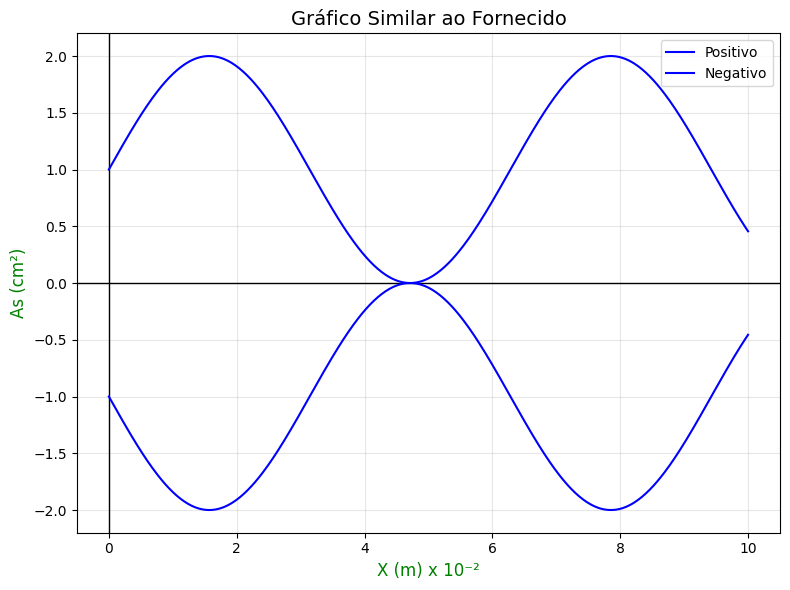

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo para o gráfico
x = np.linspace(0, 10, 500)  # Eixo x de 0 a 10
y_pos = np.sin(x) + 1  # Linha positiva
y_neg = -np.sin(x) - 1  # Linha negativa

# Configuração do gráfico
plt.figure(figsize=(8, 6))
plt.axhline(0, color='black', linewidth=1)  # Linha horizontal no eixo y
plt.axvline(0, color='black', linewidth=1)  # Linha vertical no eixo x

# Plotando as linhas
plt.plot(x, y_pos, label="Positivo", color="blue")
plt.plot(x, y_neg, label="Negativo", color="blue")

# Rótulos e escalas
plt.xlabel("X (m) x 10⁻²", fontsize=12, color="green")
plt.ylabel("As (cm²)", fontsize=12, color="green")

# Ajustes visuais
plt.grid(alpha=0.3)
plt.legend(loc='upper right', fontsize=10)
plt.title("Gráfico Similar ao Fornecido", fontsize=14)

# Mostrando o gráfico
plt.tight_layout()
plt.show()
